# Plot

This is an example of code to generate graphs from GREAT. 

At the end of the notebook, you could show the diffrence between greatpy plots ans great plots from webserver.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import greatpy as gp 
import matplotlib.pyplot as plt 

import seaborn as sns 
import pandas as pd 

In [3]:
test = "../data/tests/test_data/input/01_random.bed"
regdom = "../data/human/hg38/regulatory_domain.bed"

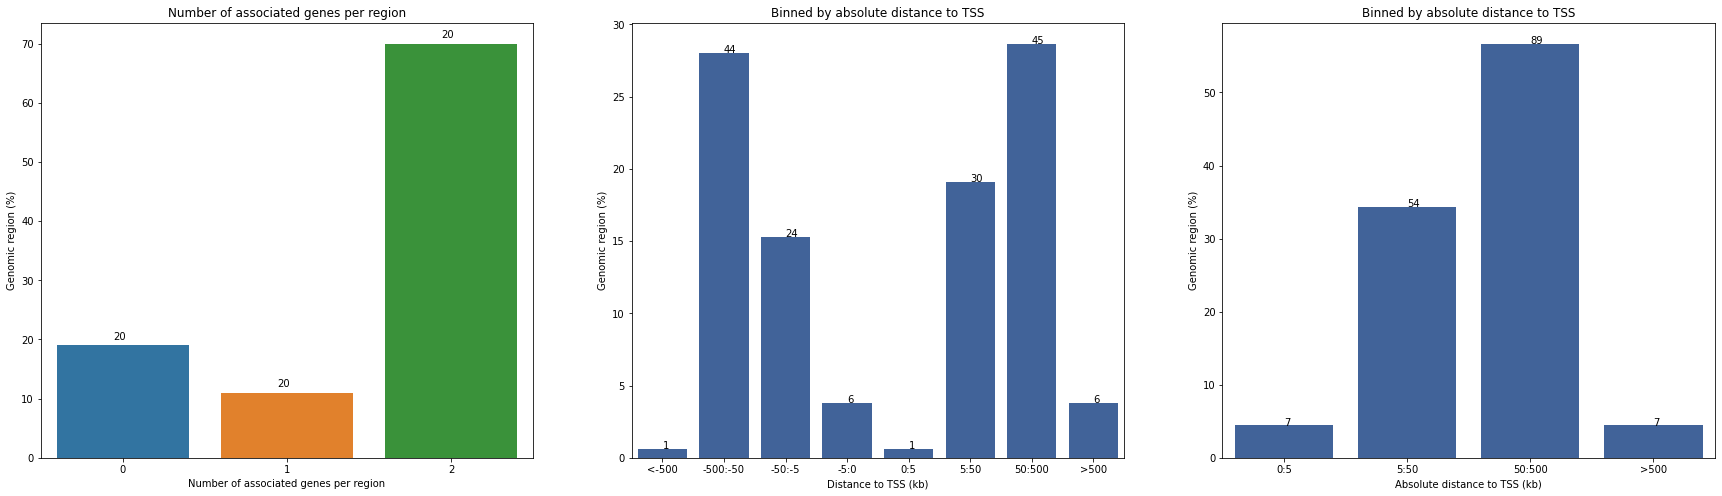

In [4]:
fig,ax = plt.subplots(1,3,figsize=(30,8))
gp.pl.graph_nb_asso_per_peaks(test,regdom,ax[0])
gp.pl.graph_dist_tss(test,regdom,ax[1])
gp.pl.graph_absolute_dist_tss(test,regdom,ax[2])
plt.show()

We should to find : 
![great_output](../_static/output_images/great_plot_output_random_region.jpg)
<!-- <p>
  <img src="_static/output_images/great_plot_output_random_region.jpg">
</p> -->

In [5]:
enrichment = gp.tl.GREAT.enrichment(
    test,
    regdom,
    "../data/human/hg38/chr_size.bed", 
    "../data/human/ontologies.csv"
)

In [7]:
enrichment

,go_term,binom_p_value,binom_fold_enrichment,hypergeom_p_value,hypergeometric_fold_enrichment,intersection_size,recall
GO:0045887,positive regulation of synaptic growth at neur...,5.20389e-13,2.18004e+05,3.08889e-03,3.23741e+02,4,4.00000e+00
GO:0044721,"protein import into peroxisome matrix, substra...",4.84198e-10,3.94065e+04,3.08889e-03,3.23741e+02,4,4.00000e+00
GO:0036250,peroxisome transport along microtubule,4.84198e-10,3.94065e+04,3.08889e-03,3.23741e+02,4,4.00000e+00
GO:0016561,"protein import into peroxisome matrix, translo...",6.31855e-10,3.68645e+04,6.16839e-03,1.61871e+02,4,2.00000e+00
GO:0030576,Cajal body organization,1.49190e-09,2.97236e+04,1.83932e-02,5.39569e+01,4,6.66667e-01
...,...,...,...,...,...,...,...
GO:0006355,"regulation of transcription, DNA-templated",9.93956e-01,2.08617e+01,8.40449e-01,5.54352e-01,1,1.71233e-03
GO:0006915,apoptotic process,9.95014e-01,2.01230e+01,5.39651e-01,1.11443e+00,1,1.72117e-03
GO:0042803,protein homodimerization activity,9.98551e-01,2.44788e+01,9.54394e-01,3.33067e-01,2,2.05761e-03
GO:0005737,cytoplasm,9.98903e-01,6.55886e+01,9.92060e-01,5.70469e-01,24,4.22907e-03


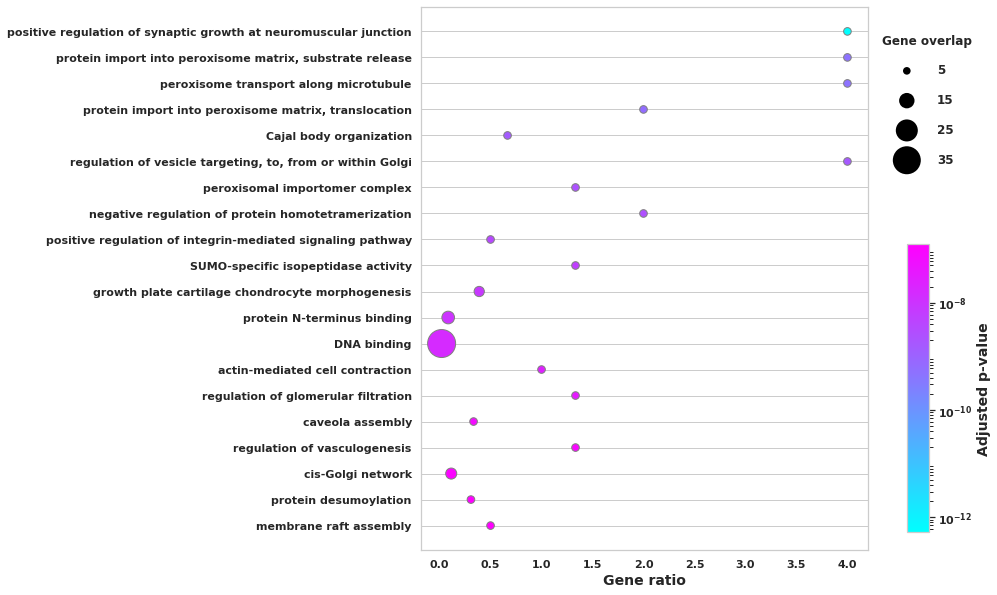

In [10]:
plot = enrichment.rename(columns={"binom_p_value" : "p_value", "go_term":"name"})
plt.figure(figsize=(10,10))
gp.pl.plot_enrich(plot)